In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 
import matplotlib.cm as cm 
import random 
from scipy.special import expit 

In [2]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex3\ex3

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex3\ex3


In [3]:
mat = scipy.io.loadmat('ex3data1.mat')

In [4]:
X, y = mat['X'], mat['y']
m=y.size

In [5]:
X=np.insert(X,0,1,axis=1)

In [6]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [7]:
def getpixels(row):
    square=row[1:].reshape((20,20))
    return square.T

In [263]:
def displayData(indices_to_display = None):
    if not indices_to_display:
        indices_to_display=random.sample(list(range(X.shape[0])),10*10)
    big_pic=np.zeros((20*10,20*10))
    irow,icol=0,0
    for idx in indices_to_display:
        if icol==10:
            irow+=1
            icol=0
        iimg=getpixels(X[idx])
        big_pic[irow*20:irow*20+iimg.shape[0],icol*20:icol*20+iimg.shape[1]] = iimg
        icol+=1
    fig=plt.figure(figsize=(6,6))
    img=scipy.misc.toimage(big_pic)
    plt.imshow(img,cmap=cm.Greys_r)
    plt.axis('off')

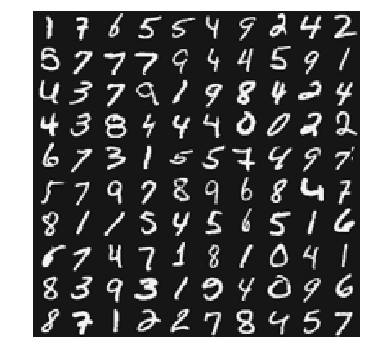

In [264]:
displayData()

In [89]:
def h(theta,x):
    return 1/(1+np.exp(-x.dot(theta)))

In [90]:
def costfunc(theta,x,y,lam=0):
    J=-1/m*(y.T.dot(np.log(h(theta,x)))+(1-y).T.dot(np.log(1-h(theta,x))))            
    reg=lam*theta[1:].T.dot(theta[1:])/2/m
    return float(J)+float(reg)

In [91]:
def gradient(theta,x,y,lam=0):
    g=1/m*(x.T.dot(h(theta,x)-y))
    reg=lam/m*theta[1:]
    g[1:]=g[1:]+reg
    return g

In [92]:
from scipy import optimize

def optimizeTheta(theta,x,y,lam=0):
    result = optimize.fmin_cg(costfunc, fprime=gradient, x0=theta, \
                              args=(x,y,lam), maxiter=50, disp=False,\
                              full_output=True)
    return result[0], result[1]

In [93]:
def buildtheta(x,y,lam=0):
    initial_theta = np.zeros((x.shape[1],1)).reshape(-1)
    Theta = np.zeros((10,x.shape[1]))
    for i in range(10):
        iclass = i if i else 10 #class "10" corresponds to handwritten zero
        print("Optimizing for handwritten number %d..."%i)
        logic_Y=np.array([1 if k==iclass else 0 for k in y])
        itheta,imincost=optimizeTheta(initial_theta,x,logic_Y,lam)
        Theta[i,:]=itheta
    print('Done!')
    return Theta

In [94]:
Theta=buildtheta(X,y)

Optimizing for handwritten number 0...
Optimizing for handwritten number 1...
Optimizing for handwritten number 2...
Optimizing for handwritten number 3...
Optimizing for handwritten number 4...
Optimizing for handwritten number 5...
Optimizing for handwritten number 6...
Optimizing for handwritten number 7...
Optimizing for handwritten number 8...
Optimizing for handwritten number 9...
Done!


In [209]:
Theta.shape

(10, 401)

In [220]:
def PredictOnevsAll(theta,x,lam=0):
    classes=[10]+list(range(1,10))
    hyp=h(theta.T,x)
    return [classes[i] for i in np.argmax(hyp,1)]

In [250]:
(y.size-np.count_nonzero(np.array(PredictOnevsAll(Theta,X))-y.T))/y.size

0.892

In [260]:
incorrect=[]
pre=PredictOnevsAll(Theta,X)
for i in range(5000):
    if bool(pre[i]-y[i]):
        incorrect.append(i)

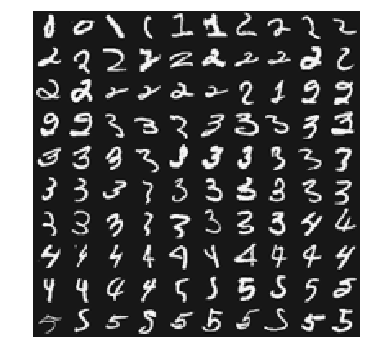

In [268]:
displayData(incorrect[:100])

In [272]:
mat=scipy.io.loadmat('ex3weights.mat')

In [276]:
Theta1,Theta2=mat['Theta1'],mat['Theta2']

In [278]:
Theta1.shape

(25, 401)

In [279]:
Theta2.shape

(10, 26)

In [310]:
def propagate(thetas,x):
    features=x
    for i in range(len(thetas)):
        theta=thetas[i]
        a=expit(theta.dot(features.T)).T
        if i==len(thetas)-1:
            return a 
        a=np.insert(a,0,1,axis=1)
        features=a

In [311]:
def predictNN(thetas,x):
    classes=list(range(1,10))+[10]
    output=propagate(thetas,x)
    return [classes[i] for i in np.argmax(output,1)]

In [312]:
Thetas=[Theta1,Theta2]

In [313]:
(y.size-np.count_nonzero(np.array(predictNN(Thetas,X))-y.T))/y.size

0.9752

In [314]:
incorrect=[]
pre=predictNN(Thetas,X)
for i in range(5000):
    if bool(pre[i]-y[i]):
        incorrect.append(i)

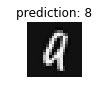

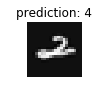

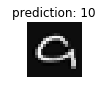

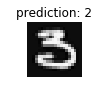

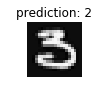

In [330]:
for k in range(5):
    random.seed(k)
    i=random.choice(incorrect)
    pre_val=predictNN(Thetas,X[i:i+1])
    pic=getpixels(X[i])
    fig=plt.figure(figsize=(1,1))
    img=scipy.misc.toimage(pic)
    plt.imshow(img,cmap=cm.Greys_r)
    plt.axis('off')
    plt.title('prediction: %s' % (pre_val[0]))